In [1]:
from keras.models import Model
import keras.models
import keras.layers as layers
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from keras import backend as K
from keras_contrib.layers.normalization import InstanceNormalization

import argparse
import capsulenet as cnet
import cnn_analyzer as cnna
import cnn_builder as cbuild
import cnn_runner as crun
import config
import csv
import niftiutils.helper_fxns as hf
import importlib
import matplotlib.pyplot as plt
import numpy as np
import operator
import os
import pandas as pd
import random
%matplotlib inline

Using TensorFlow backend.


In [2]:
importlib.reload(cnet)
importlib.reload(config)
importlib.reload(crun)
importlib.reload(hf)
importlib.reload(cbuild)
C = config.Config()
T = config.Hyperparams()
T.get_best_hyperparams()

In [66]:
train_generator, (x_test, y_test), _ = cbuild.load_data_capsnet()
(x_train, y_train), _ = next(train_generator)

In [67]:
parser = argparse.ArgumentParser()
parser.add_argument('strings', metavar='STRING', nargs='*', help='String for searching')
parser.add_argument('--epochs', default=50, type=int)
parser.add_argument('--batch_size', default=2, type=int)
parser.add_argument('--lr', default=0.001, type=float,
                    help="Initial learning rate")
parser.add_argument('--lr_decay', default=0.9, type=float,
                    help="The value multiplied by lr at each epoch. Set a larger value for larger epochs")
parser.add_argument('--lam_recon', default=0.392, type=float,
                    help="The coefficient for the loss of decoder")
parser.add_argument('-r', '--routings', default=3, type=int,
                    help="Number of iterations used in routing algorithm. should > 0")
#parser.add_argument('--shift_fraction', default=0.1, type=float,
#                    help="Fraction of pixels to shift at most in each direction.")
parser.add_argument('--debug', action='store_true',
                    help="Save weights by TensorBoard")
parser.add_argument('--save_dir', default='./result')
parser.add_argument('-t', '--testing', action='store_true',
                    help="Test the trained model on testing dataset")
parser.add_argument('--digit', default=5, type=int,
                    help="Digit to manipulate")
parser.add_argument('-w', '--weights', default=None,
                    help="The path of the saved weights. Should be specified when testing")
args = parser.parse_args('--epochs 50')# --lr 0.002 --lr_decay 0.87')

In [ ]:
importlib.reload(cnet)

model, eval_model, manipulate_model = cnet.CapsNet(input_shape=x_train.shape[1:],
                                              n_class=len(np.unique(np.argmax(y_train, 1))),
                                              routings=args.routings)
model.summary()

In [ ]:
cnet.train(model=model, data=(train_generator, (x_test, y_test)), args=args)

In [24]:
model.save('E:\\trained_model2.h5')

In [27]:
#model = keras.models.load_model('E:\\trained_model2.h5')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 24, 24, 12, 3 0                                            
__________________________________________________________________________________________________
conv1 (Conv3D)                  (None, 17, 17, 5, 25 393472      input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_7 (BatchNor (None, 17, 17, 5, 25 1024        conv1[0][0]                      
__________________________________________________________________________________________________
activation_6 (Activation)       (None, 17, 17, 5, 25 0           batch_normalization_7[0][0]      
__________________________________________________________________________________________________
primarycap

In [60]:
model = keras.models.load_model('E:\\trained_model2.h5')
eval_model.load_weights('result2\\weights-35.h5')
manipulate_model.load_weights('result2\\weights-35.h5')

C:\Users\Clinton\AppData\Local\conda\conda\envs\old-keras\lib\site-packages\keras\models.py:255: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [51]:
model.load_weights('./result/weights-35.h5')

In [ ]:
importlib.reload(cnet)
for i in range(6):
    cnet.manipulate_latent(manipulate_model, (x_test, y_test), args, i, multislice=False)

In [ ]:
importlib.reload(cnet)
cnet.test(model=eval_model, data=(x_test, y_test), args=args)

In [ ]:
a = layers.Input([28,28,1])
x = layers.Conv2D(4,kernel_size=9,strides=1)(a)
x = layers.Conv2D(4,kernel_size=9,strides=2)(x)
b = x
model = Model(a,b)
model.summary(150)

In [40]:
a = layers.Input(shape=[24,24,12,3])
x = InstanceNormalization(axis=4)(a)
x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x = layers.Reshape(target_shape=(128,1,1,1,1))(x)
x = layers.TimeDistributed(layers.Conv3DTranspose(filters=64, kernel_size=[11,11,6], strides=1, padding='valid', activation='relu'))(x)
x = layers.TimeDistributed(layers.Conv3DTranspose(filters=64, kernel_size=[4,4,2], strides=2, padding='valid', activation='relu'))(x)
#x = layers.Reshape((3, 24, 24, 12))(x)
#x = layers.Permute((2,3,4,1))(x)
b = x
model = Model(a,b)

model.summary(100)

____________________________________________________________________________________________________
Layer (type)                                 Output Shape                            Param #        
input_51 (InputLayer)                        (None, 24, 24, 12, 3)                   0              
____________________________________________________________________________________________________
instance_normalization_3 (InstanceNormalizat (None, 24, 24, 12, 3)                   6              
____________________________________________________________________________________________________
flatten_10 (Flatten)                         (None, 20736)                           0              
____________________________________________________________________________________________________
dense_34 (Dense)                             (None, 128)                             2654336        
___________________________________________________________________________________________

C_list = [config.Config(), config.Config()]
C_list[0].dims = [36,36,12]
C_list[1].dims = [24,24,12]
C_list[0].artif_dir = "E:\\imgs\\artif_imgs_3612\\"
C_list[1].artif_dir = "E:\\imgs\\artif_imgs_2412\\"
C_list[0].aug_dir = "E:\\imgs\\aug_imgs_3612_cropint\\"
C_list[1].aug_dir = "E:\\imgs\\aug_imgs_2412_cropint\\"
C_list[0].orig_dir = "E:\\imgs\\orig_imgs_3612_cropint\\"
C_list[1].orig_dir = "E:\\imgs\\orig_imgs_2412_cropint\\"

In [68]:
Z_reader = ['E103312835_1','12823036_0','12569915_0','E102093118_0','E102782525_0','12799652_0','E100894274_0','12874178_3','E100314676_0','12842070_0','13092836_2','12239783_0','12783467_0','13092966_0','E100962970_0','E100183257_1','E102634440_0','E106182827_0','12582632_0','E100121654_0','E100407633_0','E105310461_0','12788616_0','E101225606_0','12678910_1','E101083458_1','12324408_0','13031955_0','E101415263_0','E103192914_0','12888679_2','E106096969_0','E100192709_1','13112385_1','E100718398_0','12207268_0','E105244287_0','E102095465_0','E102613189_0','12961059_0','11907521_0','E105311123_0','12552705_0','E100610622_0','12975280_0','E105918926_0','E103020139_1','E101069048_1','E105427046_0','13028374_0','E100262351_0','12302576_0','12451831_0','E102929168_0','E100383453_0','E105344747_0','12569826_0','E100168661_0','12530153_0','E104697262_0']

In [76]:
importlib.reload(cnet)
importlib.reload(config)
importlib.reload(hf)
importlib.reload(cbuild)
importlib.reload(crun)
C = config.Config()
T = config.Hyperparams()
#T.steps_per_epoch = 50
#T.epochs= 1
#T.get_best_hyperparams()

In [ ]:
crun.run_fixed_hyperparams([C], hyperparams=T)#C_list)

orig_data_dict, num_samples = cbuild._collect_unaug_data()

In [ ]:
model = cbuild.build_cnn_hyperparams(T)
model.summary(line_length=150)

In [4]:
X_test, Y_test, train_generator, num_samples, train_orig, Z = cbuild.get_cnn_data(n=4, n_art=0)#, Z_test_fixed=Z_reader)
Z_test, Z_train_orig = Z
X_train_orig, Y_train_orig = train_orig

In [59]:
#from keras.utils import multi_gpu_model
#model = multi_gpu_model(model, gpus=2)

In [ ]:
hist = model.fit_generator(train_generator, steps_per_epoch=T.steps_per_epoch, epochs=T.epochs, validation_data=[X_test, Y_test])#, callbacks=[T.early_stopping])

In [71]:
model.save('E:\\models\\model_reader_rcnn.hdf5')

In [72]:
import dr_methods as drm
voi_df_art, voi_df_ven, voi_df_eq = drm.get_voi_dfs()
small_voi_df = pd.read_csv(C.small_voi_path)

In [ ]:
#plot_with_bbox(fn_list[2], cls_mapping[wrong_guesses[2]])
Y_pred = model.predict(X_test)
y_true = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_test])
y_pred = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_pred])

cm = confusion_matrix(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average="weighted")

#save_output(Z_test, y_pred, y_true)

print(accuracy_score(y_true, y_pred))
#y_true_simp, y_pred_simp, _ = cnna.merge_classes(y_true, y_pred)
#print(accuracy_score(y_true_simp, y_pred_simp))

In [3]:
model = keras.models.load_model(os.path.join(C.model_dir, "models_305.hdf5")) #models_305

In [344]:
importlib.reload(cbuild)

<module 'cnn_builder' from 'C:\\Users\\Clinton\\Documents\\voi-classifier\\python\\cnn_builder.py'>

In [312]:
X_test, Y_test, train_generator, num_samples, train_orig, Z = cbuild.get_cnn_data(n=4, n_art=0, Z_test=Z_reader)
Z_test, Z_train_orig = Z
Y_pred = model.predict(X_test)
y_true = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_test])
y_pred = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_pred])
y_true_simp, y_pred_simp, _ = cbuild.merge_classes(y_true, y_pred)

In [42]:
Y_pred = [C.classes_to_include[y] for y in y_pred]
Y_true = [C.classes_to_include[y] for y in y_true]

In [43]:
a = pd.DataFrame([Z_test,Y_pred,Y_true])

In [45]:
a.to_csv('E:\\temp.csv')

In [205]:
acc6cls = []
acc3cls = []

for i in range(19):
    model_num = 306+i
    X_test, Y_test, train_generator, num_samples, train_orig, Z = cbuild.get_cnn_data(n=4, n_art=0, Z_test=df[df['model_num'] == model_num]["z_test"])
    X_train_orig, Y_train_orig = train_orig
    model = keras.models.load_model(os.path.join(C.model_dir, "models_%d.hdf5" % model_num)) #models_305
    
    Y_pred = model.predict(X_train_orig)
    y_true = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_train_orig])
    y_pred = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_pred])

    acc6cls.append(accuracy_score(y_true, y_pred))

    y_true_simp, y_pred_simp, _ = cbuild.merge_classes(y_true, y_pred)

    acc3cls.append(accuracy_score(y_true_simp, y_pred_simp))

In [22]:
df = pd.read_excel("Z:\\Inter-reader study\\Answer key.xlsx")

In [23]:
y_true = df["Class"].values
y_pred = df["Model"].values

In [24]:
cm = confusion_matrix(y_true, y_pred, labels=C.classes_to_include)

In [46]:
for i in range(len(cm)):
    print('\t'.join(cm[:,i].astype(str)))

10	0	1	0	0	1
0	9	1	0	0	0
0	1	8	0	0	0
0	0	0	10	0	0
0	0	0	0	9	0
0	0	0	0	1	9


In [72]:
fn_list = fn_list + list(Z_test[~np.equal(y_pred, y_true)])

In [74]:
fn_list = fn_list + list(Z_train_orig[~np.equal(y_pred, y_true)])
fn_list = fn_list + list(Z_train_orig[~np.equal(y_pred, y_true)])

In [75]:
fn_x_list = [x+"("+str(voi_df_art[voi_df_art["id"] == x[:-4]]["x1"].values[0])+")" for x in fn_list]

In [76]:
unique, counts = np.unique(fn_x_list, return_counts=True)

In [ ]:
dict(zip(unique, counts))

In [195]:
Y_pred = model.predict(X_train_orig)
y_true = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_train_orig])
y_pred = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_pred])

cm = confusion_matrix(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average="weighted")

#cbuild.save_output(Z_train_orig, y_pred, y_true)#, save_dir=C.output_img_dir+"\\training")

In [10]:
model = keras.models.load_model(os.path.join(C.model_dir, "models_305.hdf5")) #models_305
#cnna.visualize_layer(model, 'conv3d_148')

In [6]:
importlib.reload(cbuild)

<module 'cnn_builder' from 'C:\\Users\\Clinton\\Documents\\voi-classifier\\python\\cnn_builder.py'>

In [7]:
model_dense_outputs = cbuild.build_pretrain_model(model)

In [ ]:
model_dropout = cbuild.build_model_forced_dropout(model, )

In [8]:
orig_data_dict, num_samples = cbuild._collect_unaug_data()

In [11]:
filters_by_cls = {cls: model_dense_outputs.predict(orig_data_dict[cls][0], verbose=False) for cls in C.classes_to_include}

C:\Users\Clinton\AppData\Local\conda\conda\envs\old-keras\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


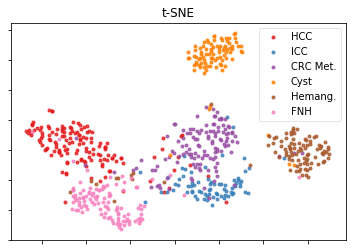

In [10]:
fig = cnna.tsne(filters_by_cls)
fig.show()

(array([ 40.,  44.,  45.,  44.,  44.,  49.,  47.,  41.,  50.,  25.,  28.,
         23.,   9.,   2.,   3.]),
 array([-1.        , -0.82258032, -0.64516064, -0.46774096, -0.29032129,
        -0.11290161,  0.06451807,  0.24193775,  0.41935743,  0.59677711,
         0.77419678,  0.95161646,  1.12903614,  1.30645582,  1.4838755 ,
         1.66129518]),
 <a list of 15 Patch objects>)

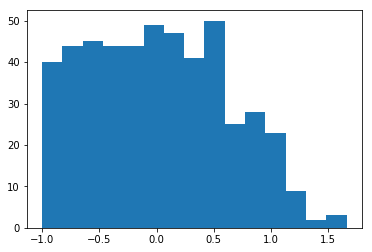

In [29]:
x = 15
plt.hist(filter_results[:,x], bins=15, range=[-1, np.amax(filter_results[:,x])])

In [13]:
filter_results[:,0]

(637, 100)

C:\Users\Clinton\AppData\Local\conda\conda\envs\old-keras\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


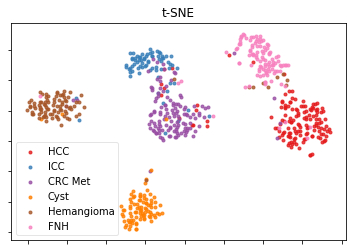

In [35]:
fig = cnna.tsne(filters_by_cls)
fig.show()

In [94]:
filters_by_cls = {cls: model_dense_outputs.predict(orig_data_dict[cls][0], verbose=False) for cls in C.classes_to_include}
filter_results = np.concatenate([filters_by_cls[cls] for cls in C.classes_to_include], axis=0)

filter_avgs = np.mean(filter_results, axis=0)
filter_stds = np.std(filter_results, axis=0)

#filter_cls_avg_unscaled = {cls: np.mean(filter_results[cls], axis=0) for cls in C.classes_to_include}
#filter_cls_avg_scaled = {cls: np.mean(filter_results[cls], axis=0) / filter_avgs for cls in C.classes_to_include}

In [224]:
len(hf.flatten([list(feature_sheet["evidence1"+cls].dropna().values) for cls in C.classes_to_include]))

137

In [40]:
importlib.reload(cnna)
C=config.Config()

In [31]:
features_by_cls, feat_count = cnna.collect_features()
all_features = list(feat_count.keys())
cls_features = {f: [c for c in C.classes_to_include if f in features_by_cls[c]] for f in all_features}

z = dict(zip(*np.unique(features_by_cls['colorectal'], return_counts=True)))
for k in z:
    print(k, " (",z[k],")", sep="")

In [ ]:
feat_count

In [32]:
Z_features = cnna.get_annotated_files(features_by_cls)

In [97]:
feature_filter_means = {f:np.empty([0,100]) for f in all_features}#{cls: {} for cls in features}
feature_filter_stds = {f:np.empty([0,100]) for f in all_features}
feature_filters_scaled = {}#{cls: {} for cls in features}

for f in all_features:
    for cls in C.classes_to_include:
        x_features = orig_data_dict[cls][0][np.where(np.isin(orig_data_dict[cls][1], Z_features[f]))]
        if x_features.size > 0:
            feature_filters[f] = np.concatenate([feature_filters[f], model_dense_outputs.predict(x_features, verbose=False)], axis=0)# / filter_avgs
        
    feature_filters[f] = (feature_filters[f] - filter_avgs) / filter_stds
    
    feature_filter_means[f] = np.mean(feature_filters[f], axis=0)# / filter_avgs
    feature_filter_stds[f] = np.std(feature_filters[f], axis=0)# / filter_avgs

    #ff = feature_filters[f]
    #feature_filters[f] = np.where(ff > np.mean(ff), ff, 0)

    #ff = feature_filters[cls][f]
    #feature_filters[cls][f] = np.where(ff > 1*filter_cls_avg_unscaled[cls], ff, 0)

    #ff = feature_filters[f]
    #feature_filters[f] = np.where(ff > 1.3*filter_avgs, ff, 0)

    feature_filters_scaled[f] = feature_filter_means[f] / filter_avgs

header = ['filter_num']
for cls in C.classes_to_include:
    header += [f+"_"+cls for f in features_by_cls[cls]]

with open('E:\\feature_filters.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(header)
    for f_num in range(100):
        writer.writerow([f_num] + [feature_filters[f][f_num] for cls in features for f in features_by_cls[cls]])

In [98]:
Z_test_features = ['E106097391_0', 'E104978772_1', '12900535_0', 'E100150242_0', 'E105490014_0', 'E103147618_0', 'E103510187_0', 'E104657225_0', 'E100551966_0', 'E101388602_0', 'E100215900_8', 'E100215900_7', 'E104045692_0', '13104521_0', 'E100383453_0', '12943286_0', '12271995_0', 'E102315724_0', 'E104949189_0', 'E100511083_1', 'E101579471_0', '13018986_1', '13203550_8', '13112385_0', '12712463_0', '12361082_0', '13028374_0', 'E103985934_1', 'E100529980_0', '12042703_3', '12961059_0', 'E105724706_2', 'E100592424_2', 'E103104254_0', 'E104546069_0', 'E101665217_1', '12090000_0', 'E100592424_1', '12961059_1', 'E105474285_0', '12502068_1', 'E100814791_0', 'E102613189_0', 'E105427046_0', 'E102881031_1', 'E102929168_0', 'E102310482_0', 'E102095465_0', 'E101811299_0', 'E104737273_0', '12890053_0', 'E100168661_1', '12637865_0', 'E100168661_2', '12239783_0', '12707781_0', '12706568_1', '12823036_0', '12404081_0', '12365693_1']

x_test = {cls: orig_data_dict[cls][0][np.where(np.isin(orig_data_dict[cls][1], Z_test_features))] for cls in C.classes_to_include}
Z_test = {cls: orig_data_dict[cls][1][np.where(np.isin(orig_data_dict[cls][1], Z_test_features))] for cls in C.classes_to_include}

In [100]:
# Least squares approach
Theta = np.array([feature_filter_means[f] for f in all_features])
Theta = np.transpose(Theta, (1,0))

filters_test = {}
features_test = {}
for cls in C.classes_to_include:
    filters_test[cls] = model_dense_outputs.predict(x_test[cls], verbose=False)
    filters_test[cls] = (filters_test[cls] - filter_avgs) / filter_stds
    features_test[cls] = np.linalg.lstsq(Theta, np.transpose(filters_test[cls], (1,0)))[0]
    #filters_test[cls] = np.apply_along_axis(lambda x: x / filter_avgs, 1, filters_test[cls])

In [33]:
from sklearn.decomposition import FactorAnalysis

In [99]:
fa = FactorAnalysis(10)

In [36]:
filter_results.shape

(637, 100)

In [89]:
from numpy import matmul, diag

In [87]:
def covar_to_corr(covar):
    A = np.diag(np.diag(covar)**(-0.5))
    return np.matmul(np.matmul(A, covar), A)

In [90]:
corr = covar_to_corr(dummy_fa.get_covariance())

In [91]:
np.linalg.eigvals(corr - np.linalg.pinv(np.diag(np.diag(np.linalg.pinv(corr)))))

array([ 0.86432985,  0.77706867,  0.73722482,  0.70007852,  0.6703194 ,
        0.6396881 ,  0.62704754,  0.60131155,  0.5644361 ,  0.54769903,
        0.51382436,  0.49272142,  0.47670797,  0.45435715,  0.43734397,
        0.37965782,  0.40126965,  0.40844652,  0.35606447,  0.33869287,
        0.31115289,  0.31574807,  0.30108907,  0.28008588,  0.27095144,
        0.24031059,  0.23455892,  0.17931324,  0.19848681,  0.21154704,
        0.20446893,  0.15757454,  0.14667135,  0.13962024,  0.12605019,
        0.11005696,  0.0914527 ,  0.07829848,  0.07178497,  0.05006212,
        0.03546445,  0.05585928, -0.00495976,  0.01292725,  0.01019532,
        0.00298989, -0.0241302 , -0.03784669, -0.04947386, -0.09684478,
       -0.06184055, -0.07662597, -0.08171125, -0.08760026, -0.11568789,
       -0.12219417, -0.13907671, -0.1910547 , -0.1873059 , -0.18704667,
       -0.14773644, -0.15118701, -0.18358924, -0.18252017, -0.181822  ,
       -0.18141973, -0.15542784, -0.17997608, -0.1791589 , -0.17

In [ ]:
def get_cutoff_eigenval()

In [65]:
dummy = np.random.normal(size=filter_results.shape)
dummy_fa = FactorAnalysis()
dummy_fa.fit(dummy)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=None,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=0.01)

In [95]:
np.linalg.eigvals(dummy_fa.get_covariance())

array([ 1.96887628,  1.86410062,  1.82358228,  1.78646271,  1.76322162,
        1.72458305,  1.71589152,  1.6774047 ,  1.63758595,  1.62955528,
        1.57844781,  1.56588794,  1.53895194,  1.49944534,  1.49220493,
        1.46824644,  1.44968177,  1.42190132,  1.40360225,  1.40038411,
        1.36999952,  1.36123613,  1.34515469,  1.32940433,  1.31250153,
        1.29681373,  1.27797069,  1.24706429,  1.24051521,  1.22657828,
        1.21882128,  1.19114541,  1.17277009,  1.17827974,  1.15613474,
        1.14049462,  1.11474795,  1.10698268,  1.10228976,  1.0824057 ,
        1.07166984,  1.05527761,  1.03266428,  1.01950805,  1.00690728,
        1.01410674,  0.98740847,  0.97643327,  0.97282187,  0.95449356,
        0.94852969,  0.93284215,  0.92898381,  0.90313983,  0.8964125 ,
        0.87822081,  0.78732581,  0.79053601,  0.86878468,  0.795596  ,
        0.86350611,  0.85912296,  0.85622157,  0.80313946,  0.85138484,
        0.8039912 ,  0.84943527,  0.80693547,  0.80752315,  0.80

In [101]:
sum(np.linalg.eigvals(fa.get_covariance()) > np.mean(np.linalg.eigvals(dummy_fa.get_covariance())))

8

In [100]:
fa.fit(filter_results)

FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=10,
        noise_variance_init=None, random_state=0, svd_method='randomized',
        tol=0.01)

In [ ]:
np.linalg.eigvals()

In [53]:
x=3
fa.get_covariance()[x,x] - fa.noise_variance_[x]

0.89081373261106078

cls = "colorectal"
x_test_quick = orig_data_dict[cls][0][np.where(orig_data_dict[cls][1] == "E105724706_2.npy")]
x_test_quick = orig_data_dict["fnh"][0][np.where(orig_data_dict["fnh"][1] == "E104189184_0.npy")]
filters_quick = model_dense_outputs.predict(x_test_quick, verbose=False)

In [ ]:
img_num = 0
evidence = {}

for f in all_features:
    evidence[f + "/" + str(cls_features[f])] = cnna.get_evidence_strength(feature_filters[f], filters_quick[0])#filters_test[true_cls][img_num])
    #max_strength = max(max_strength, evidence[f + "/" + str(cls_features[f])])

#for f in evidence:
#    evidence[f] /= max_strength
print("Detected features:")
for f,strength in sorted(evidence.items(), key=lambda x:x[1], reverse=True)[:5]:
    #if strength > 1:
    print("- " + f, "- %d%%" % (strength*100))

hf.plot_section_auto(x_test_quick[0])#[true_cls][img_num])

In [101]:
output = {}
for cls in C.classes_to_include:
    for img_num in range(len(filters_test[cls])):
        z = Z_test[cls][img_num]
        x = np.expand_dims(x_test[cls][img_num], axis=0)
        evidence = {}
        
        output[z] = [cls]
        
        preds = model.predict(x, verbose=False)[0]
        for pred_cls, pred_conf in sorted(zip(C.classes_to_include, preds), key=lambda x:x[1], reverse=True)[:2]:
            output[z] = output[z] + [pred_cls]
        
        #for f in all_features:
        #    evidence[f + "/" + str(cls_features[f])] = get_evidence_strength(feature_filters[f], filters_test[cls][img_num])
        
        for i in range(len(all_features)):
            evidence[all_features[i] + "/" + str(cls_features[all_features[i]])] = features_test[cls][i, img_num]
        
        f1='infiltrative'
        f2='lobulated margins'
        if evidence[f1 + "/" + str(cls_features[f1])] < evidence[f2 + "/" + str(cls_features[f2])]:
            evidence.pop(f1 + "/" + str(cls_features[f1]))
        else:
            evidence.pop(f2 + "/" + str(cls_features[f2]))
        
        for f,strength in sorted(evidence.items(), key=lambda x:x[1], reverse=True):
            output[z] = output[z] + [f, strength]

In [104]:
with open('E:\\filters_pred5.csv', 'w', newline='') as csvfile:
    header = ['img_fn', 'agreement1', 'agreement2', 'true_cls', 'pred_cls1', 'pred_cls2'] + \
            [s for i in range(len(all_features)) for s in ['feature_%d' % i,'strength_%d' % i]]
    writer = csv.writer(csvfile)
    writer.writerow(header)
    for z_num in range(len(Z_test_features)):
        writer.writerow([Z_test_features[z_num]] + [output[Z_test_features[z_num]][0] in output[Z_test_features[z_num]][3], \
                        output[Z_test_features[z_num]][0] in output[Z_test_features[z_num]][5]] + output[Z_test_features[z_num]])